In [1]:
import os, sys
sys.path.append('CommonUtils/')
import CommonUtils as cu

import argparse, math
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
from scipy import optimize

In [2]:
df_data=pd.read_csv("df_binned.csv")
df_info=pd.read_csv("df_info.csv")

In [3]:
# add to common utils 
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [4]:
display_side_by_side(df_data, df_info)

,Unnamed: 0,bincenters,ymean,xerr,yerr
0,1,0.152301,-0.076308,0.145026,0.043424
1,2,0.442353,-0.002594,0.145026,0.042003
2,3,0.732404,0.042376,0.145026,0.040703
3,4,1.022456,0.099553,0.145026,0.038935
4,5,1.312507,0.116654,0.145026,0.037167
5,6,1.602559,0.120240,0.145026,0.036087
6,7,1.892610,0.027373,0.145026,0.035351
7,8,2.182661,-0.097767,0.145026,0.035208
8,9,2.472713,-0.131670,0.145026,0.035668
9,10,2.762764,-0.165456,0.145026,0.037005


In [5]:
x=df_data['bincenters']
y=df_data['ymean']
x_err=df_data['xerr']
y_err=df_data['yerr']

#### Define $y(x) = A\sin(bx)+c$

In [90]:
def sin_unblinded(**args):
    return A * np.sin(b * t)+c

#function, X, Y, [starting par]
# Levenberg-Marquardt algorithm as implemented in MINPACK
par, pcov = optimize.curve_fit(sin_unblinded, x, y, sigma=y_err, p0=[0.22, 1.5, -0.1], absolute_sigma=False, method='lm')

par_e = np.sqrt(np.diag(pcov))

print("Params:", par)
print("Errors:", par_e)
print("Cov:", pcov)

TypeError: sin_unblinded() takes 0 positional arguments but 4 were given

,Unnamed: 0,edm_setting,data_type,Q_cut,time_cut,p_cut,x_label,y_label,N
0,0,$d_{\mu} = 5.4\times10^{-18} \ e\cdot{\mathrm{cm}}$,VertexExt,AllStationsNoTQ,t>0 $\mathrm{\mu}$s,0<p<3600 MeV,$t^{mod}_{g-2} \ \mathrm{[\mu}$s],$\langle\theta_y\rangle$ [mrad],5243759


ndf 12
$\frac{\chi^2}{DoF}$= 1.08

 A= +0.17 ± 0.01 mrad
b= +1.33 ± 0.04 MHz
c= -0.08 ± 0.01 mrad


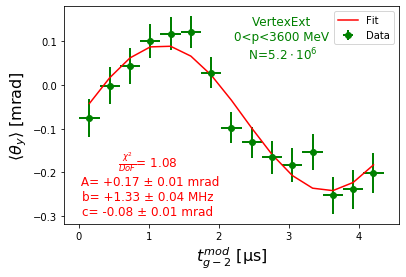

In [89]:
display_side_by_side(df_info) 
fig, ax = plt.subplots()
ax.errorbar(x,y,xerr=x_err, yerr=y_err, linewidth=0, elinewidth=2, color="green", marker="o", label="Data")
ax.plot(x, sin_unblinded(x, par[0], par[1], par[2]), color="red", label='Fit')
ax.legend(loc='best')
ax.set_ylabel(df_info['y_label'][0], fontsize=16)
ax.set_xlabel(df_info['x_label'][0], fontsize=16)

# deal with fitter parameters
parNames=[" A", "b", "c"]
units=["mrad", "MHz", "mrad"]
prec=2
chi2_n=chi2_ndf(x, y, y_err, sin_unblinded, par)
legend1=r"$\frac{\chi^2}{DoF}$= "+"{0:.{prec}f}".format(chi2_n, prec=prec)+"\n"
print(legend1)

for i, i_name in enumerate(parNames):
        value=i_name+"= {0:+.{prec}f}".format(par[i], prec=prec)+" \u00B1 {0:.{prec}f}".format( par_e[i], prec=prec)+" "+units[i]
        print(value)
        legend1+=value+"\n"


legend2=df_info['data_type'][0]+"\n"+df_info['p_cut'][0]+"\n N="+cu.sci_notation(df_info['N'][0])

#decide on the postion based on the plot type
y1=0.15
x1=0.65
y2=0.85
x2=0.25

if (df_info['data_type'][0]=="VertexExt"):
    x1=0.25
    x2=0.65
 
    
cu.textL(ax, x1, y1, legend1, font_size=12, color="red")    
cu.textL(ax, x2, y2, legend2, font_size=12)


plt.savefig("testFit.png", dpi=300)

In [60]:
def chi2_ndf(x, y, y_err, func, pars):
    '''
    Calcualte chi2
    '''    
    chi2=0
    
#     print("len(x)", len(x))

    for i in range(len(x)):
        #print("i", i)
        r = y[i] - func(x[i], pars[0], pars[1], pars[2])  # TODO generalise for any N of parameters
        #print("r", r)
#         chi2+=(r)**2/(y_e)**2
        chi2+=(r)**2/y_err[i]**2
        #print("chi2", chi2)

    ndf = len(x) - len(pars)
    print("ndf", ndf)
    
    return chi2/ndf



In [56]:
chi2_n=chi2_ndf(x, y, y_err, sin_unblinded, par)
print("chi2_n=", chi2_n)

ndf 12
chi2_n= 1.082169212151882
